### Question 6: Create an appropriate visualization to show the distribution of profiles.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import file

df_final_subset = pd.read_pickle(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\02 Data\Prepared Data\'final_subset_sample.pkl')

In [3]:
#check head

df_final_subset.head()

,gender,state,age,n_dependants,fam_status,income,order_number,loyalty_flag,spending_flag,frequency_flag,...,busiest_period_of_day,region,department,age_group,income_group,dependents_group,customer_profile,customer_income_profile,time_period,day
2,Female,Alabama,31,3,married,40423,7,New Customer,Low Spender,Non-frequent customer,...,Most orders,South,beverages,Mid-Age Adult,Low Income,Parent,Married Older Parent,Low income married older parent,Between 8 am and 5 pm,Sunday
7,Female,Alabama,31,3,married,40423,5,New Customer,Low Spender,Non-frequent customer,...,Most orders,South,snacks,Mid-Age Adult,Low Income,Parent,Married Older Parent,Low income married older parent,Between 8 am and 5 pm,Wednesday
12,Female,Alabama,31,3,married,40423,3,New Customer,Low Spender,Non-frequent customer,...,Most orders,South,pantry,Mid-Age Adult,Low Income,Parent,Married Older Parent,Low income married older parent,Between 8 am and 5 pm,Tuesday
17,Female,Alabama,31,3,married,40423,7,New Customer,Low Spender,Non-frequent customer,...,Most orders,South,breakfast,Mid-Age Adult,Low Income,Parent,Married Older Parent,Low income married older parent,Between 8 am and 5 pm,Sunday
24,Female,Indiana,69,0,divorced/widowed,54313,22,Regular Customer,Low Spender,Regular customer,...,Most orders,Midwest,snacks,Elderly Adult,Middle Income,No Children,Single Female w/o Children,Middle income single female without children,Between 8 am and 5 pm,Sunday


In [4]:
#check shape

df_final_subset.shape

(3914726, 27)

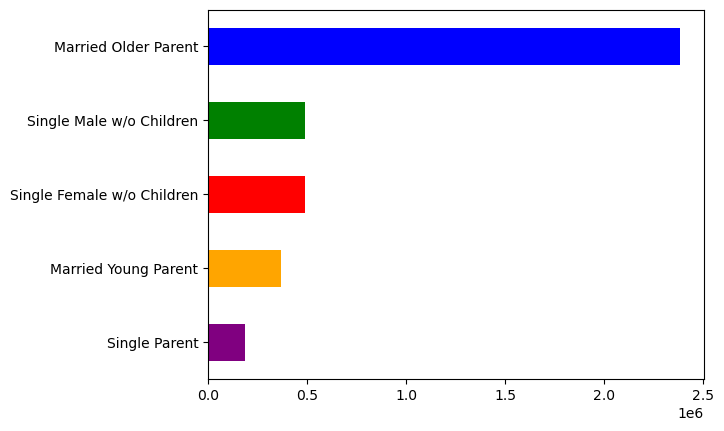

In [5]:
#create bar chart from customer profile

bar = df_final_subset['customer_profile'].value_counts().sort_values(ascending=True).plot.barh(color =['purple', 'orange', 'red', 'green', 'blue'])

In [6]:
#export as image

bar.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\'customer_profile.png')

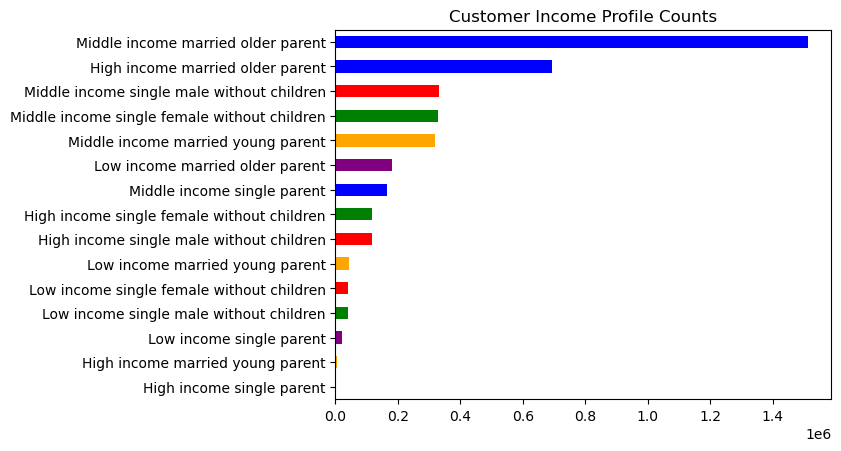

In [7]:
# Create bar chart

bar_cust_inc_prof = df_final_subset['customer_income_profile'].value_counts().sort_values(ascending=True).plot.barh(color = ['purple','orange','purple', 'green','red', 'orange', 'red', 'green', 'blue', 'purple','orange','green','red','blue', 'blue'], title = 'Customer Income Profile Counts' )

In [8]:
#export as image

bar_cust_inc_prof.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\'customer_income_profile_counts.png')

Married older parent consists of largest income group

In [9]:
#check frequency

df_final_subset['customer_profile'].value_counts(dropna = False)

Married Older Parent          2383944
Single Male w/o Children       488618
Single Female w/o Children     487974
Married Young Parent           365855
Single Parent                  188335
Name: customer_profile, dtype: int64

There is no information for married couples without children

#### Question 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [10]:
#aggregate customer profile by prices

df_final_subset.groupby('customer_profile').agg({'prices':['min','mean','max']})

prices                    
                              min       mean      max
customer_profile                                     
Married Older Parent          1.0  12.109219  99999.0
Married Young Parent          1.0  12.332553  99999.0
Single Female w/o Children    1.0  10.892388  99999.0
Single Male w/o Children      1.0  12.788122  99999.0
Single Parent                 1.0  11.947734  99999.0

In [11]:
#aggregate customer profile by order numbers

df_final_subset.groupby('customer_profile').agg({'order_number':['min','mean','max']})

order_number               
                                    min       mean max
customer_profile                                      
Married Older Parent                  1  17.072833  99
Married Young Parent                  1  16.996179  99
Single Female w/o Children            1  17.456617  99
Single Male w/o Children              1  17.156576  99
Single Parent                         1  17.434672  99

In [12]:
#create crosstab of orders and prices

crosstab = pd.crosstab(df_final_subset['prices'], df_final_subset['order_number'], dropna = False)

In [13]:
crosstab.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
prices,,,,,,,,,,,,,,,,,,,,,
1.0,877,920,931,785,722,680,569,525,470,469,...,6,8,8,7,5,9,9,5,0,6
1.1,1824,1857,1715,1638,1442,1340,1209,1107,1043,897,...,18,16,13,20,11,17,19,14,17,9
1.2,2239,2121,2142,1897,1645,1564,1380,1211,1089,924,...,5,12,9,11,8,10,14,13,14,11
1.3,3252,3223,3136,2848,2491,2202,2104,1898,1790,1590,...,23,34,25,18,20,24,26,26,23,19
1.4,2895,2813,2811,2528,2285,2014,1900,1682,1607,1462,...,34,30,26,33,23,15,30,14,17,15


In [14]:
crosstab.shape

(242, 99)

In [15]:
grouped = df_final_subset.groupby('customer_profile').agg({'order_number':['sum']})

In [16]:
grouped.head()

,order_number
,sum
customer_profile,
Married Older Parent,40700678
Married Young Parent,6218137
Single Female w/o Children,8518375
Single Male w/o Children,8383012
Single Parent,3283559


In [17]:
# Aggregate customer income profile by prices

df_final_subset.groupby('customer_income_profile').agg({'prices':['min', 'mean', 'max']})

prices                     
                                                min        mean      max
customer_income_profile                                                 
High income married older parent                1.0   21.243034  99999.0
High income married young parent                1.0  298.223815  99999.0
High income single female without children      1.0   16.702132  99999.0
High income single male without children        1.0   25.446918  99999.0
High income single parent                       1.0  250.131247  99999.0
Low income married older parent                 1.0    6.567643     25.0
Low income married young parent                 1.0    6.695324     25.0
Low income single female without children       1.0    6.572490     25.0
Low income single male without children         1.0    6.616895     25.0
Low income single parent                        1.0    6.714652     25.0
Middle income married older parent              1.0    8.589105  99999.0
Middle income married young parent              1.0    9.423584  99999.0
Middle income single female without children    1.0    9.337553  99999.0
Middle income single male without children      1.0    9.018627  99999.0
Middle income single parent                     1.0    9.324824  99999.0

#### Question 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

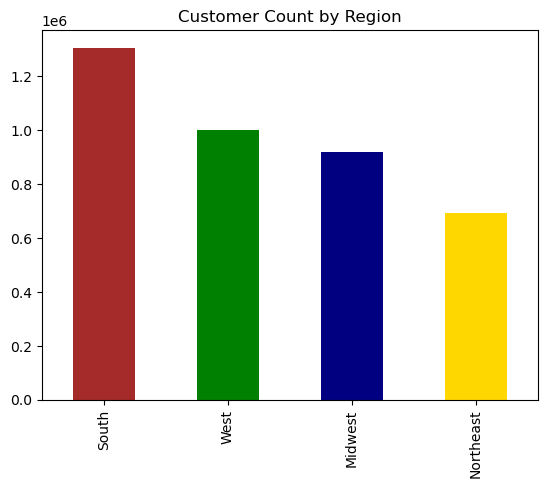

In [18]:
region_bar = df_final_subset['region'].value_counts().plot.bar(title = 'Customer Count by Region', color =['brown', 'green', 'navy', 'gold'])

In [19]:
#export as image

region_bar.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\'four_regions.png')

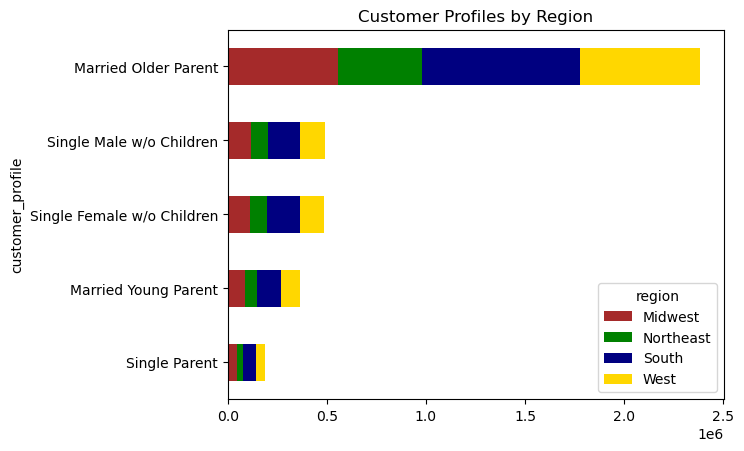

In [20]:
# Group customer profile and regions

cust_prof_region = df_final_subset.groupby(['customer_profile', 'region']).size().unstack()

# Sort

cust_prof_region = cust_prof_region.loc[cust_prof_region.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

cust_prof_region_bar = cust_prof_region.plot.barh(stacked = True, title = 'Customer Profiles by Region', color = ['brown', 'green', 'navy', 'gold'])

In [21]:
#export as image

cust_prof_region_bar.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\'cust_prof_by_region.png')

In [22]:
#create crosstab of customer profile and region

crosstab_profile_region = pd.crosstab(df_final_subset['customer_profile'], df_final_subset['region'], dropna = False)

In [23]:
crosstab_profile_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Married Older Parent,556793,425808,792763,608580
Married Young Parent,85612,62934,122081,95228
Single Female w/o Children,114273,84451,166806,122444
Single Male w/o Children,115315,87084,159863,126356
Single Parent,44923,32234,64325,46853


In [24]:
#create crosstab of customer income profile and region

crosstab_inc_profile_region = pd.crosstab(df_final_subset['customer_income_profile'], df_final_subset['region'], dropna = False)

In [25]:
crosstab_inc_profile_region

region,Midwest,Northeast,South,West
customer_income_profile,,,,
High income married older parent,165315,124798,227429,174410
High income married young parent,1034,559,1275,1226
High income single female without children,27366,20217,41245,29401
High income single male without children,28214,21056,38244,30434
High income single parent,435,189,1118,543
Low income married older parent,41193,32198,60184,46570
Low income married young parent,10333,7349,15359,10242
Low income single female without children,8755,6938,14096,10712
Low income single male without children,9363,7320,12988,10234


According to the bar charts above, highest frequency of orders are located in the South and the fewest frequency of orders are located in the Northeast.

Across all profiles, highest frequencies are married older parents and smallest frequencies are singles. Ironically, there is higher frequencies of middle income married older parents than high income married older parents in the report. Upper income single parents also have lowest frequencies in particular.